In [41]:
from numpy import *
from matplotlib.pyplot import *
import matplotlib.pylab as pylab
import matplotlib.lines as mlines
%matplotlib inline
pylab.rcParams['figure.figsize']= 16,5
import pandas as pd
import gc

In [21]:
def get_TS():
    rawData = pd.read_csv('Resources/Consulta_Banxico.csv', sep=',', encoding='latin1', skiprows=15, skip_blank_lines=True)
    Data = rawData.drop(rawData.index[:2])
    Data = Data.reset_index(drop = True)
    Data.columns = ['Fecha' , 'Tasa de crecimiento Mensual']
    TS = pd.Series(Data['Tasa de crecimiento Mensual'].astype(float))
    TS.index= Data['Fecha']
    del Data
    return TS

In [91]:
def plot_Solutions(PredictsList,Mean,TS,MeanMSE,Mse):
    """
    Function to Plot List of predictions, mean predictions and Original Time Serie
    :param PredictsList: List of predictions make
    :param Mean: Mean prediction
    :param TS: Original Time Serie
    :return: matplotlib fig
    """
    fig = figure()
    TSValPredictions = TS[len(TS)-13:len(TS)-6].copy()
    for x in PredictsList:
        TSPredictions = pd.Series(x.astype(float), index = TS.index[len(TS)-12:len(TS)-6])
        TSValPredictions[1:] = TSPredictions.copy()
        TSValPredictions.plot(style = 'yo-')
    TSValOutputs = TS[len(TS)-13:len(TS)-6].copy()
    TSValOutputs.plot(style= 'ko-')
    TSMean = pd.Series(Mean.astype(float), index = TS.index[len(TS)-12:len(TS)-6])
    TSMeanPred = TS[len(TS)-13:len(TS)-6].copy()
    TSMeanPred[1:] = TSMean
    TSMeanPred.plot(style= 'bo-')
    linePred = mlines.Line2D([],[],color='yellow', marker='o',label = 'Predictions')
    lineMean = mlines.Line2D([],[],color='blue', marker='o',label = 'Mean Prediction')
    lineVal = mlines.Line2D([],[],color='black', marker='o',label = 'True Values')
    title('mean MSE= ' + (str)(MeanMSE) + '        RMSE = ' + (str)(Mse))
    legend(handles = [linePred,lineMean,lineVal],loc= 1)
    fig.savefig("Results/iteraciones/preds.png")
    del fig
    gc.collect()

In [22]:
predictions = pd.read_csv("Results/iteraciones/predicions.csv" )
TS = get_TS()

In [3]:
MeanMSE = predictions['MSE'].mean()

In [13]:
preds = ['Pred1','Pred2','Pred3','Pred4','Pred5','Pred6']

In [16]:
Config = ['Param1','Param2','Param3','Param4','Param5']

In [19]:
mse = ['MSE']

In [28]:
meanPred = np.mean(predictions[preds])

In [87]:
RMSE = np.sqrt(np.mean((TS[-12:-6].values-meanPred)**2))

In [83]:
print meanPred.values
print TS[-12:-6].values

[-5.08528271  6.68600334 -0.21162525  1.37078002  0.80942781  0.96755033]
[-5.09  7.91 -1.05  1.96  0.27  0.78]


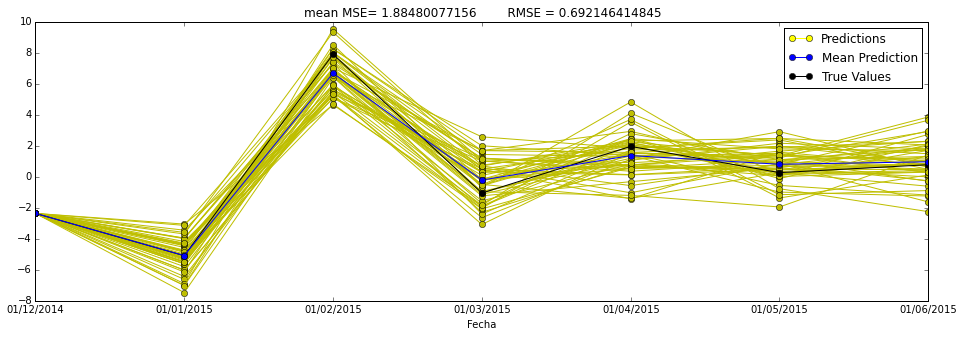

In [92]:
plot_Solutions(predictions[preds].as_matrix(),meanPred.as_matrix(),TS,MeanMSE,RMSE)